        Date   Door TO Door  GARDEN/Biomass  PRIVATE Vehicle    TOTAL  \
0  01-02-2021       552.300          55.200            6.600  614.100   
1  02-02-2021       543.375          52.270           13.055  608.700   
2  03-02-2021       526.965          53.205           10.780  590.950   
3  04-02-2021       532.745          53.550           16.580  602.875   
4  05-02-2021       534.260          58.375            7.675  600.310   

   DEBRIS C&D Waste         Day  
0             29.245     Monday  
1             28.920    Tuesday  
2             31.100  Wednesday  
3             34.815   Thursday  
4             28.845     Friday  
    Collection Date  Door TO Door  GARDEN/Biomass  PRIVATE Vehicle    TOTAL  \
176      2021-07-27       568.220          52.290           34.990  655.500   
177      2021-07-28       558.925          57.845           12.150  628.920   
178      2021-07-29       567.030          54.960           26.930  648.920   
179      2021-07-30       539.635        

<AxesSubplot:xlabel='Day', ylabel='TOTAL'>

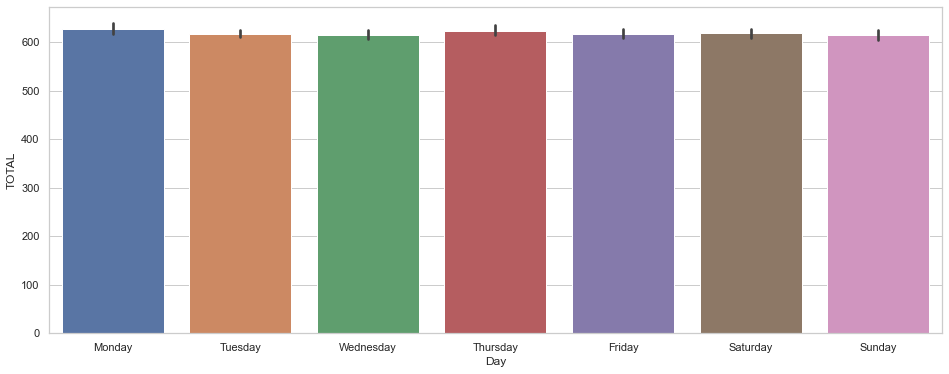

In [2]:
import pandas as pd
from pandas import Series as s
import seaborn as sns
import datetime
import numpy as np
from matplotlib import pyplot as plt

dailycollection = pd.read_csv("Data/MSWMonthWiseCollectioncsv.csv")

print(dailycollection.head())

#Rename column names with extra spaces
dailycollection.rename(columns = {"Date ":"Collection Date", "DEBRIS C&D Waste ":"DEBRIS C&D Waste"}, inplace = True)

#Converting to format of Date required by Series 'YYYY-mm-dd'
dailycollection["Collection Date"] =   pd.to_datetime(dailycollection["Collection Date"], format='%d-%m-%Y').dt.strftime('%Y-%m-%d')

#Adding new column Day_Index for computations
dailycollection['Day_Index'] = pd.to_datetime(dailycollection['Collection Date']).dt.dayofweek


print(dailycollection.tail())

sns.set_theme(style="whitegrid")

plt.figure(figsize=(16, 6))

sns.barplot(x="Day", y = "TOTAL", data = dailycollection )




<AxesSubplot:>

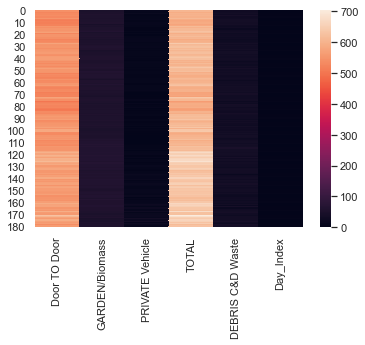

In [6]:
collectionwithoutdate =  pd.DataFrame(dailycollection)
collectionwithoutdate.drop(['Collection Date','Day'], axis = 1, inplace = True)
sns.heatmap(collectionwithoutdate)

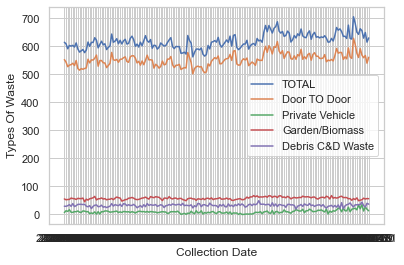

In [7]:
sns.lineplot(data=dailycollection, x="Collection Date", y="TOTAL")

sns.lineplot(data=dailycollection, x="Collection Date", y="Door TO Door")


sns.lineplot(data=dailycollection, x="Collection Date", y="PRIVATE Vehicle")


sns.lineplot(data=dailycollection, x="Collection Date", y="GARDEN/Biomass")

p = sns.lineplot(data=dailycollection, x="Collection Date", y="DEBRIS C&D Waste")

p.set_ylabel("Types Of Waste")

plt.legend(labels=["TOTAL","Door TO Door","Private Vehicle","Garden/Biomass","Debris C&D Waste"])



<AxesSubplot:xlabel='Collection Date', ylabel='DEBRIS C&D Waste'>

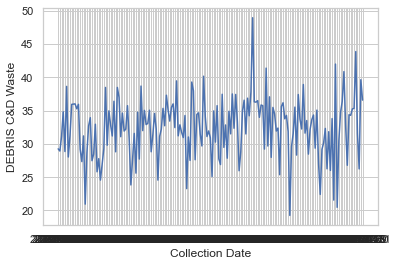

In [8]:
sns.lineplot(data=dailycollection, x="Collection Date", y="DEBRIS C&D Waste")


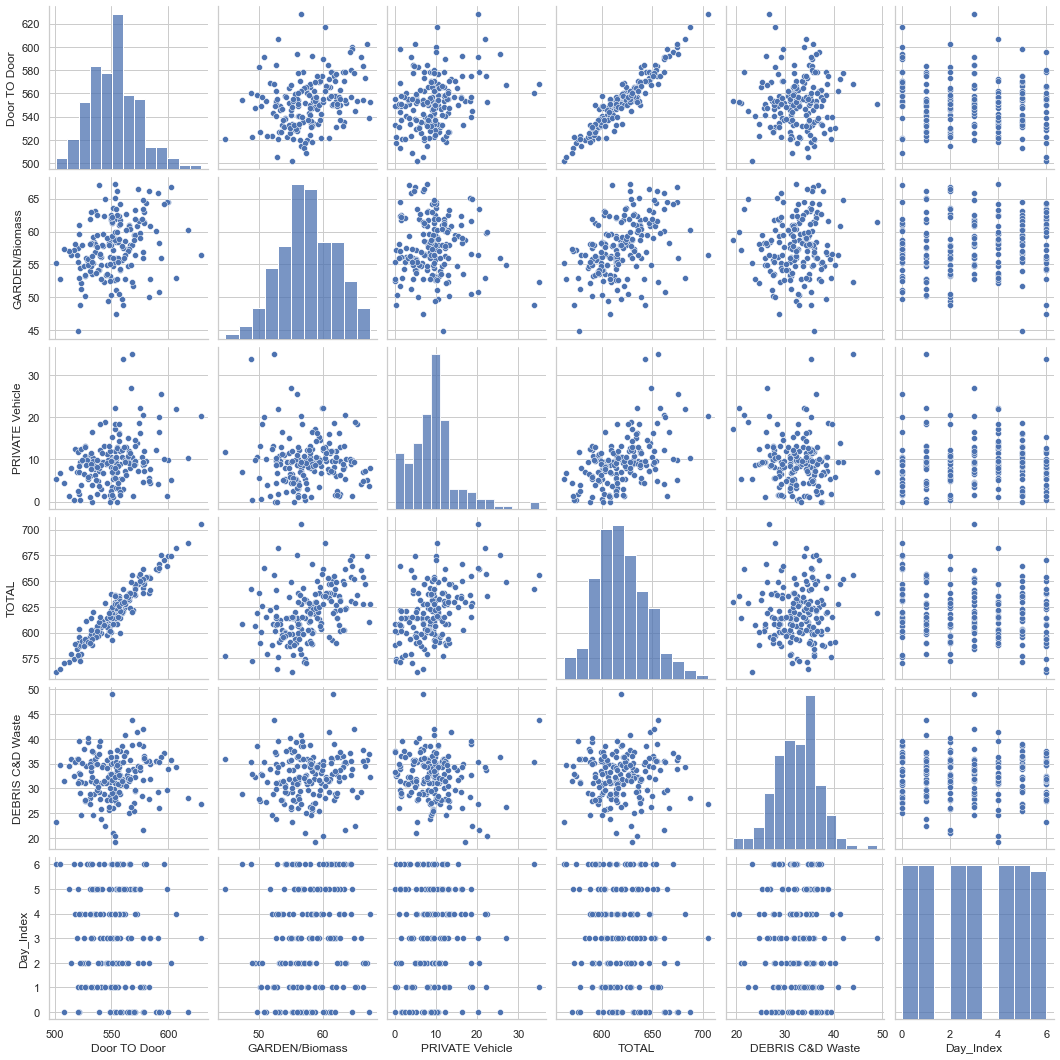

In [9]:
sns.pairplot(dailycollection)


In [44]:
# sns.lineplot('Collection Date', 'Value', hue='Waste Type', 
#              data=pd.melt(dailycollection, 'Collection Date', var_name='Waste Type', 
#               value_name='Value'))

# Dickey Fuller Test


In [3]:
rolling_mean = dailycollection.rolling(6).mean()
rolling_std = dailycollection.rolling(6).std()
print(rolling_mean)
sns.lineplot(rolling_mean)

     Door TO Door  GARDEN/Biomass  PRIVATE Vehicle       TOTAL  \
0             NaN             NaN              NaN         NaN   
1             NaN             NaN              NaN         NaN   
2             NaN             NaN              NaN         NaN   
3             NaN             NaN              NaN         NaN   
4             NaN             NaN              NaN         NaN   
..            ...             ...              ...         ...   
176    588.326667       53.397500        24.586667  666.310833   
177    576.743333       53.623333        23.227500  653.594167   
178    570.079167       53.956667        24.046667  648.082500   
179    564.192500       53.561667        24.397500  642.151667   
180    564.322500       54.770000        20.934167  640.026667   

     DEBRIS C&D Waste  Day_Index  
0                 NaN        NaN  
1                 NaN        NaN  
2                 NaN        NaN  
3                 NaN        NaN  
4                 NaN        NaN

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: If using all scalar values, you must pass an index

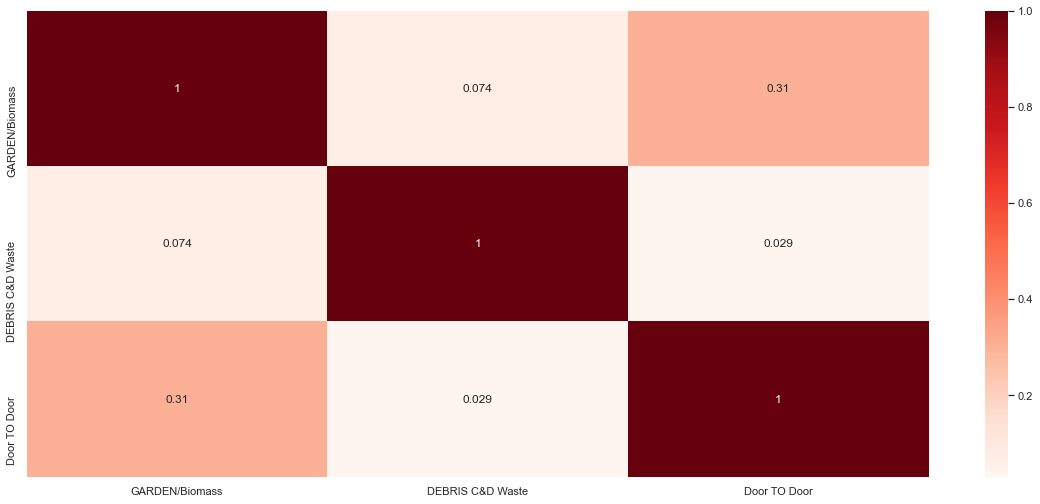

In [37]:
correlation_mat = dailycollection[['GARDEN/Biomass','DEBRIS C&D Waste','Door TO Door']].corr()
sns.heatmap(correlation_mat, annot = True, cmap='Reds')
plt.show()

<AxesSubplot:xlabel='Day', ylabel='TOTAL'>

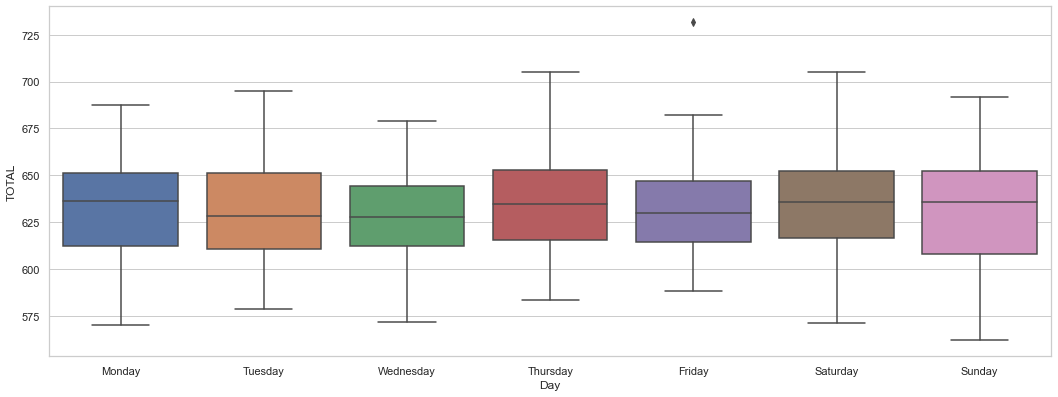

In [179]:
plt.figure(figsize=(16, 6))

sns.boxplot(x = dailycollection['Day'], y =  dailycollection['TOTAL'])

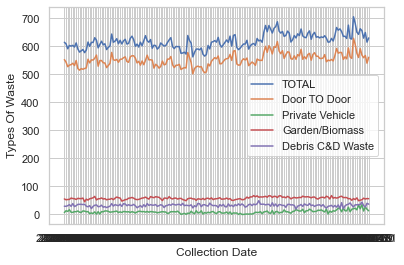

In [10]:
sns.lineplot(data=dailycollection, x="Collection Date", y="TOTAL")

sns.lineplot(data=dailycollection, x="Collection Date", y="Door TO Door")


sns.lineplot(data=dailycollection, x="Collection Date", y="PRIVATE Vehicle")


sns.lineplot(data=dailycollection, x="Collection Date", y="GARDEN/Biomass")

p = sns.lineplot(data=dailycollection, x="Collection Date", y="DEBRIS C&D Waste")

p.set_ylabel("Types Of Waste")

plt.legend(labels=["TOTAL","Door TO Door","Private Vehicle","Garden/Biomass","Debris C&D Waste"])

#Simple Moving Average


In [53]:

dailycollection.info()
dailycollection_ma = dailycollection[:]
# set year column as index
dailycollection_ma.set_index('Collection Date', inplace=True)

# dailycollection_ma.index.name = 'DEBRIS C&D Waste'

dailycollection_ma['average_waste'] = dailycollection_ma.mean(axis=1)

# drop columns containing monthly values
# visualize the first 5 columns
dailycollection_ma.head()
plt.style.use('seaborn')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Collection Date   181 non-null    object 
 1   Door TO Door      181 non-null    float64
 2   GARDEN/Biomass    181 non-null    float64
 3   PRIVATE Vehicle   181 non-null    float64
 4   TOTAL             181 non-null    float64
 5   DEBRIS C&D Waste  181 non-null    float64
 6   Day               181 non-null    object 
 7   Day_Index         181 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 11.4+ KB


Text(0, 0.5, 'Waste Collection in  [Tonnes]')

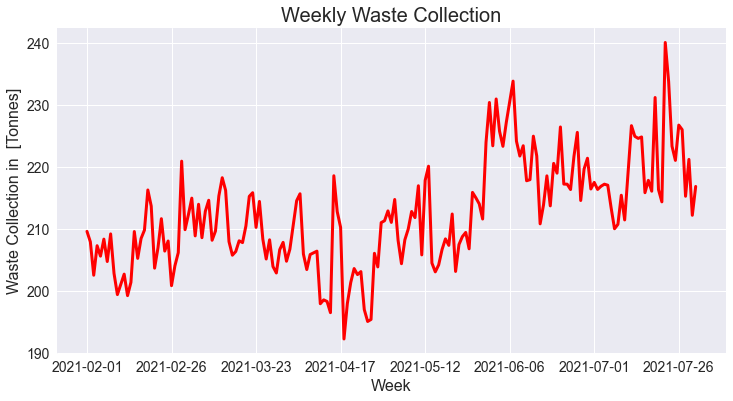

In [54]:
dailycollection_ma.head()
dailycollection_ma.drop(
    ['TOTAL', 'PRIVATE Vehicle', 'DEBRIS C&D Waste', 'Day', 'Day_Index', 'GARDEN/Biomass', 'Door TO Door'], axis=1,
    inplace=True)
dailycollection_ma.plot(color='red', linewidth=3, figsize=(12, 6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend('')

# title and labels
plt.title('Weekly Waste Collection', fontsize=20)
plt.xlabel('Week', fontsize=16)
plt.ylabel('Waste Collection in  [Tonnes]', fontsize=16)

Text(0, 0.5, 'Weight [Tonnes]')

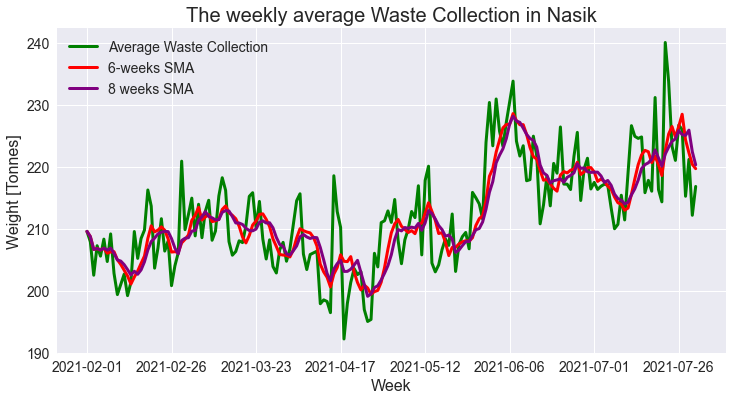

In [55]:
#Simple Moving Average
dailycollection_ma['SMA_6'] = dailycollection_ma.average_waste.rolling(6, min_periods=1).mean()

dailycollection_ma['SMA_8'] = dailycollection_ma.average_waste.rolling(8, min_periods=1).mean()
# colors for the line plot
colors = ['green', 'red', 'purple']

dailycollection_ma.plot(color=colors, linewidth=3, figsize=(12, 6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Average Waste Collection', '6-weeks SMA', '8 weeks SMA'], fontsize=14)

# title and labels
plt.title('The weekly average Waste Collection in Nasik', fontsize=20)
plt.xlabel('Week', fontsize=16)
plt.ylabel('Weight [Tonnes]', fontsize=16)